In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pydataset import data
import seaborn as sns

In [2]:
data('mpg', show_doc = True) # this will allow to review the information about the data

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

- On average, which manufacturer has the best miles per gallon?

In [40]:
mpg = data('mpg')
average_mileage = (mpg['cty'] + mpg['hwy'])/2
mpg.insert(9, 'average_mileage', average_mileage)
mpg.groupby('manufacturer').average_mileage.agg(['mean']).sort_values(by = 'mean' , ascending = False).head(1)



,mean
manufacturer,
honda,28.5


How many different manufacturers are there?

In [41]:
mpg['manufacturer'].nunique()

15

How many different models are there?

In [42]:
mpg['model'].nunique()

38

Do automatic or manual cars have better miles per gallon?

In [60]:
auto_mean_mileage = mpg[mpg['trans'].str.startswith('a')].average_mileage.agg(['mean']) # outputs the mean mileage of all the automatic
# models

manual_mean_mileage = mpg[mpg['trans'].str.startswith('m')].average_mileage.agg(['mean']) # outputs the mean mileage of all the manual 
# models

print(f'The mean mileage for all the automatic model is {auto_mean_mileage}')
print()

print(f'The mean mileage for all the automatic model is {manual_mean_mileage}')


The mean mileage for all the automatic model is mean    19.130573
Name: average_mileage, dtype: float64

The mean mileage for all the automatic model is mean    22.227273
Name: average_mileage, dtype: float64


#2. Joining and Merging
    Copy the users and roles dataframes from the examples above. What do you think a right join would look like? 
    An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [61]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

# a right join will, just like in SQL, will produce all the records from the right table regardless if they have
# or dont have values on left talbe and vice-versa for left join


# an outer join will produce all the records from both right and left table


# if you drop the primary keys, the joined table will be messy and it will be difficult to gather useful information
# from the table

3. Getting data from SQL databases

    a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.


In [64]:
from env import host, user, password

# creating a function that generates the url for sql
def get_db_url(host, user, password, database_name):
    user = user
    host = host
    password = password
    db = database_name
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


In [81]:
# loading the employees table from employees databse

sql_query = 'SELECT * FROM employees'
employee_url = get_db_url(host, user, password, 'employees')
employees = pd.read_sql(sql_query, employee_url)
employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


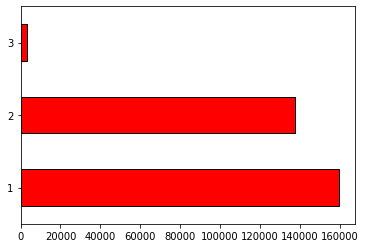

In [109]:
# loading titles table from employees database

titles = pd.read_sql('''SELECT * From titles''', employee_url)

# getting the count of emp_no whihc is indicative of the number of times an employee changes a title because
# every time an employee changes a title, they are counted again
title_changes = titles.emp_no.value_counts()

# getting the count of the changes and plotting for a better visual
title_changes.value_counts().plot(kind = 'barh',
                                 ec = 'black', color = 'red')


- For each title, find the hire date of the employee that was hired most recently with that title.

In [125]:
employees_titles = pd.merge(employees, titles, left_on = "emp_no", right_on = 'emp_no', how = "inner")
employees_titles.groupby('title')[['hire_date']].agg('max')

,hire_date
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


- Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

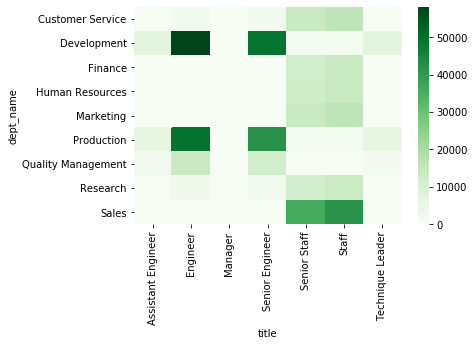

In [132]:
# most importantly, write a sql query to get the data you want from the databse

qry = '''select de.emp_no, de.dept_no, t.title, d.dept_name
    from dept_emp de
    join titles t on t.emp_no = de.emp_no
    join departments d on d.dept_no = de.dept_no'''
new_df = pd.read_sql(qry, employee_url)

# once the sql query gets the needed data, cross tab is easy, just use pd.crosstab and select the desired columns
data = pd.crosstab(new_df.dept_name, new_df.title)

# generating a heat map
sns.heatmap(data, annot = False, cmap = plt.cm.Greens)

4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [146]:
chipotle_url = get_db_url(host, user, password, 'chipotle') # generating the url using the function we have created above
query = 'select * from orders'  # writing the sql query to import the data from the databse
chipotle= pd.read_sql(query, chipotle_url) # reading the data from the database 
chipotle.head(20) # getting the top 20 rows of data

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


- What is the total price for each order?

In [147]:
chipotle['item_price'] = chipotle['item_price'].str.replace('$', "").astype(float)
chipotle.head(5)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


- What is the total price for each order?

In [152]:
chipotle.groupby('order_id')[['item_price']].sum()

,item_price
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


- What are the most popular 3 items?

In [164]:
# first we are grouping the dataframe by item name
# second, we are using the quantity columns and counting the quantity of the item_name
# then we are sorting by the quantity in descending order and getting the top 3 records


chipotle.groupby('item_name')[['quantity']].count().sort_values(by = 'quantity' , ascending = False).head(3)

,quantity
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479


- Which item has produced the most revenue?

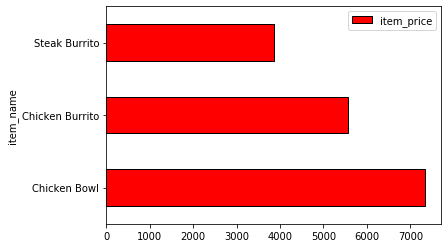

In [167]:
# first we are grouping by the item_name
# secondly, we are selecting the item price and then summing to get the total price per item
# then we are sorting the values in descending order
# finally, we are plotting the top 3 revenue generator in chipotle


chipotle.groupby('item_name')[['item_price']].sum().sort_values(by = 'item_price' , ascending = False).head(3).plot(kind = 'barh',
                                                                                                                    color = 'red', 
                                                                                                                   ec = 'black')